In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import time

import datetime as dt
from dateutil.relativedelta import relativedelta

Load the WE data stored in the numpy file.

In [2]:
file = "data.npy"
data = np.load(file)

START_DATE = dt.datetime(1979, 1, 1)

In [3]:
def calc_station_properties(data_array):
    """
    Helper function to calculate properties such as mean, std, max, 
    ... for one particular grid cell.
    
    data_array: 1d array which contains the values for one grid cell
    
    returns: dictionary containing properties of this grid cell
    """
    
    mean = np.mean(data_array)
    std = np.std(data_array)
    max_val = np.max(data_array)
    min_val = np.min(data_array)
    
    prop_dict = {
        'mean': mean,
        'std': std,
        'max_val': max_val,
        'min_val': min_val,
    }
    
    return prop_dict

In [4]:
gridded_means = np.zeros_like(data[0])
gridded_stds  = np.zeros_like(data[0])

for i in range(gridded_means.shape[0]):
    for j in range(gridded_means.shape[1]):
        prop_dict = calc_station_properties(data[:, i, j])
        gridded_means[i][j] = prop_dict['mean']
        gridded_stds[i][j]  = prop_dict['std']

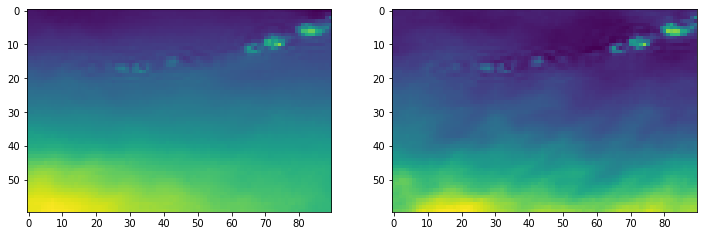

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(gridded_means)
axs[1].imshow(gridded_stds)

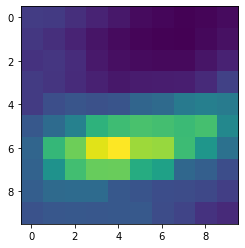

In [6]:
plt.imshow(data[0, :10, 80:])

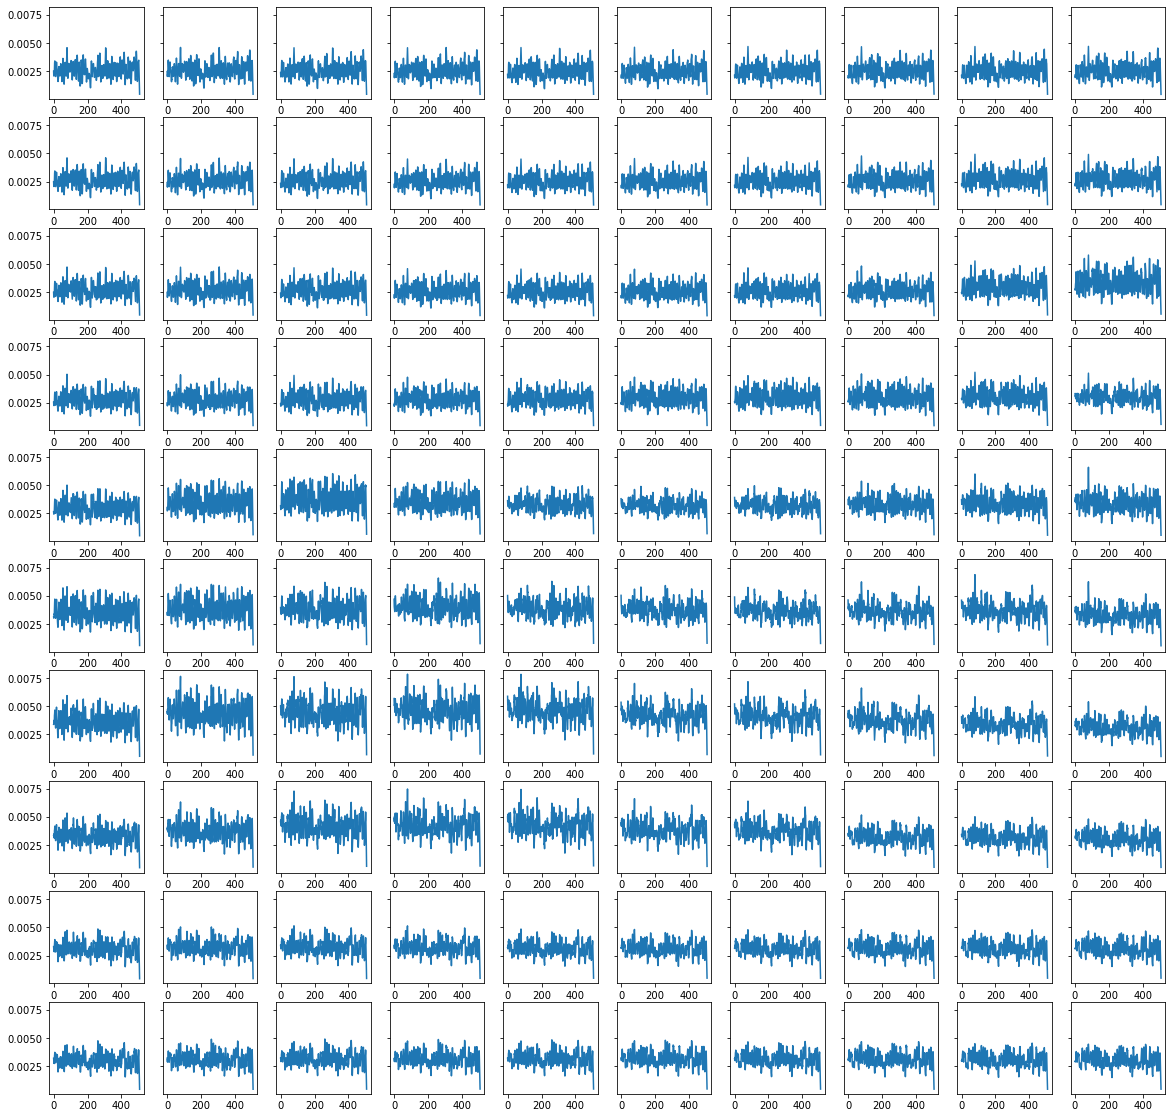

In [7]:
data_part = data[:, :10, 80:]

fig, axs = plt.subplots(10, 10, figsize=(20, 20), sharey=True)
x = np.arange(data_part.shape[0])

for i in range(data_part.shape[1]):
    for j in range(data_part.shape[2]):
        len_conv = 5
        smoothed_data = np.convolve(data_part[:, i, j], np.ones(len_conv)) / len_conv
        axs[i][j].plot(x, smoothed_data[len_conv-1:])

<IPython.core.display.Javascript object>


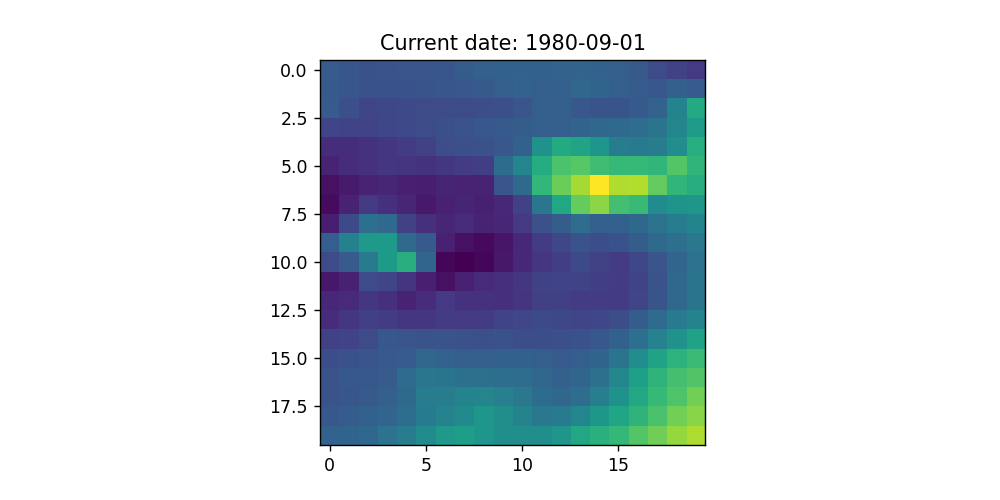

In [10]:
%matplotlib notebook
def update(t, ax, data):
    curr_date = START_DATE + relativedelta(months=t)
    ax.set_title(f"Current date: {curr_date.strftime('%Y-%m-%d')}")
    # time.sleep(0.2)
    ax.imshow(data[t])
    return None

data_part = data[:, :20, 70:]
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
ITERATIONS = data_part.shape[0]

anim = FuncAnimation(fig, update, frames=ITERATIONS, interval=50, blit=True, 
                     fargs=([ax, data_part]))